In [11]:
import pandas as pd 
import numpy as np 
import cufflinks as cf
import pandas_datareader.data as web
import yfinance as yf 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [12]:
cf.set_config_file(offline=True)

In [28]:
symbol = ['MSFT', 'AAPL', 'AMZN', 'NFLX']
start_date = '2010-01-01'
end_date = '2021-01-01'

In [29]:
df = yf.download(symbol, start=start_date, end=end_date, interval='1d')
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                      Close              \
                AAPL        AMZN       MSFT      NFLX      AAPL        AMZN   
Date                                                                          
2009-12-31  6.462008  134.520004  23.585039  7.870000  7.526071  134.520004   
2010-01-04  6.562591  133.899994  23.948717  7.640000  7.643214  133.899994   
2010-01-05  6.573935  134.690002  23.956453  7.358571  7.656429  134.690002   
2010-01-06  6.469369  132.250000  23.809435  7.617143  7.534643  132.250000   
2010-01-07  6.457407  130.000000  23.561821  7.485714  7.520714  130.000000   

                                     High              ...        Low  \
                 MSFT      NFLX      AAPL        AMZN  ...       MSFT   
Date                                                   ...              
2009-12-31  30.480000  7.870000  7.619643  137.279999  ...  30.480000   
2010-01-04  30.950001  7.640000  7.660714  136.610001  ...  30.590000   
2010-01-05  30.959999  7.358571  7.699643  135.479996  ...  30.639999   
2010-01-06  30.770000  7.617143  7.686786  134.729996  ...  30.520000   
2010-01-07  30.450001  7.485714  7.571429  132.320007  ...  30.190001   

                          Open                                      Volume  \
                NFLX      AAPL        AMZN       MSFT      NFLX       AAPL   
Date                                                                         
2009-12-31  7.864286  7.611786  137.089996  30.980000  7.947143  352410800   
2010-01-04  7.565714  7.622500  136.250000  30.620001  7.931429  493729600   
2010-01-05  7.258571  7.664286  133.429993  30.850000  7.652857  601904800   
2010-01-06  7.197143  7.656429  134.600006  30.879999  7.361429  552160000   
2010-01-07  7.462857  7.562500  132.009995  30.629999  7.731429  477131200   

                                          
                AMZN      MSFT      NFLX  
Date                                      
2009-12-31   4523000  31929700   5291300  
2010-01-04   7599900  38409100  17239600  
2010-01-05   8851900  49749600  23753100  
2010-01-06   7178800  58182400  23290400  
2010-01-07  11030200  50559700   9955400  

[5 rows x 24 columns]

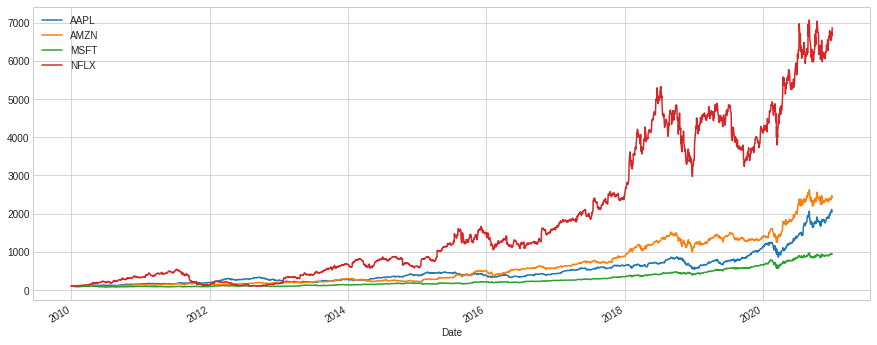

In [37]:
(df['Adj Close']/df['Adj Close'].iloc[0, :]).multiply(100).plot(figsize=(15,6))
plt.show()

In [39]:
(df['Adj Close'].iloc[-200:]/df['Adj Close'].iloc[-200:].iloc[0, :]).multiply(100).iplot()

In [38]:
cf.colors.scales()

In [42]:
data = (df['Adj Close'].iloc[-200:]/df['Adj Close'].iloc[-200:].iloc[0, :]).multiply(100)

In [43]:
data

,AAPL,AMZN,MSFT,NFLX
Date,,,,
2020-03-19,100.000000,100.000000,100.000000,100.000000
2020-03-20,93.651453,98.147720,96.244134,100.240938
2020-03-23,91.661901,101.164312,95.284133,108.505253
2020-03-24,100.857923,103.145780,103.945051,107.616784
2020-03-25,100.302311,100.261036,102.950027,103.120205
...,...,...,...,...
2020-12-24,217.002243,168.676657,157.309603,154.796245
2020-12-28,224.763498,174.592349,158.870347,156.347317
2020-12-29,221.770810,176.614755,158.298304,159.886154


In [47]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [64]:
data.iplot(colorscale='plotly', theme='white', xTitle='date', yTitle='price')

In [84]:
data[['AAPL', 'MSFT']].iloc[:100].iplot(kind='spread', title='AAPL vs MSFT')

/home/kachain/anaconda3/envs/DL/lib/python3.8/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/kachain/anaconda3/envs/DL/lib/python3.8/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [71]:
aapl = df.swaplevel(axis=1)['AAPL']

In [72]:
aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2009-12-31,6.462008,7.526071,7.619643,7.520000,7.611786,352410800
2010-01-04,6.562591,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.573935,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.469369,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.457407,7.520714,7.571429,7.466071,7.562500,477131200
...,...,...,...,...,...,...
2020-12-24,131.352829,131.970001,133.460007,131.100006,131.320007,54930100
2020-12-28,136.050766,136.690002,137.339996,133.509995,133.990005,124486200
2020-12-29,134.239273,134.869995,138.789993,134.339996,138.050003,121047300


In [76]:
aapl.iloc[-50:].iplot(kind='candle', theme='white', title='AAPL')

In [82]:
aapl.iloc[-50:].iplot(kind='ohlc', theme='white', title='AAPL')

In [94]:
aapl_weekly = aapl.resample('W-Fri', label='right').agg({'Open':'first','High':'max','Low':'min','Close':'last'})
aapl_weekly
# index is Friday but it should be Monday

,Open,High,Low,Close
Date,,,,
2010-01-01,7.611786,7.619643,7.520000,7.526071
2010-01-08,7.622500,7.699643,7.466071,7.570714
2010-01-15,7.600000,7.607143,7.289286,7.354643
2010-01-22,7.440357,7.698214,7.041429,7.062500
2010-01-29,7.232500,7.632500,6.794643,6.859286
...,...,...,...,...
2020-12-04,116.970001,123.779999,116.809998,122.250000
2020-12-11,122.309998,125.949997,120.150002,122.410004
2020-12-18,122.599998,129.580002,121.540001,126.660004


In [95]:
from pandas.tseries.frequencies import to_offset

In [96]:
#change index to Monday
aapl_weekly.index = aapl_weekly.index - to_offset('4d')

In [97]:
aapl_weekly

,Open,High,Low,Close
Date,,,,
2009-12-28,7.611786,7.619643,7.520000,7.526071
2010-01-04,7.622500,7.699643,7.466071,7.570714
2010-01-11,7.600000,7.607143,7.289286,7.354643
2010-01-18,7.440357,7.698214,7.041429,7.062500
2010-01-25,7.232500,7.632500,6.794643,6.859286
...,...,...,...,...
2020-11-30,116.970001,123.779999,116.809998,122.250000
2020-12-07,122.309998,125.949997,120.150002,122.410004
2020-12-14,122.599998,129.580002,121.540001,126.660004


In [99]:
aapl_weekly.iloc[-50:].iplot(kind='candle', title='AAPL weekly')

In [107]:
qf  = cf.QuantFig(df=aapl.iloc[-50:])

In [ ]:
qf.add_volume(colorchange=True)

In [110]:
qf.iplot(name='AAPL', title='AAPL')

In [112]:
qf  = cf.QuantFig(df=aapl.iloc[-100:])
qf.add_sma(periods=20)
qf.iplot()

In [113]:
qf = cf.QuantFig(df=aapl.iloc[-100:])
qf.add_bollinger_bands()
qf.iplot()

In [114]:
qf = cf.QuantFig(df=aapl.iloc[-100:])
qf.add_macd()
qf.add_dmi()
qf.iplot()

In [118]:
qf = cf.QuantFig(df=aapl.iloc[-100:])
qf.add_trendline(date0='2020-09-02', date1='2020-11-24')
qf.iplot(name='AAPL')

In [121]:
qf = cf.QuantFig(df=aapl.iloc[-100:])
qf.add_resistance(date='2020-09-02')
qf.add_support(date='2020-09-21')
qf.iplot(name='AAPL')